In [76]:
from sriApp.modelos.lsi_model import LSIModel
from ir_datasets import load
import matplotlib.pyplot as plt
import statistics as stat
import time
import numpy as np
#from extract_lg import extract_Dk_Rq

In [77]:
datasets = {
    "beir/arguana": {'count': 8674},
    #"beir/dbpedia-entity": {'count': 4635922},
    "beir/fiqa": {'count': 57638},
    "beir/cqadupstack/android": {'count': 22998},
    "beir/cqadupstack/english": {'count': 40221},
    "beir/cqadupstack/gaming": {'count': 45301},
    "beir/cqadupstack/gis": {'count': 37637},
    "beir/cqadupstack/mathematica": {'count': 16705},
    "beir/cqadupstack/physics": {'count': 38316},
    "beir/cqadupstack/programmers": {'count': 32176},
    "beir/cqadupstack/stats": {'count': 42269},
    "beir/cqadupstack/tex": {'count': 68184},
    "beir/cqadupstack/unix": {'count': 47382},
    "beir/cqadupstack/webmasters": {'count': 17405},
    "beir/cqadupstack/wordpress": {'count': 48605},
    "cranfield": {'count': 1400}
}

In [78]:
dataset_name = "cranfield"
lsi_model = LSIModel(dataset_name)

CARGADO Modelo Latente


In [79]:
dataset = load(dataset_name)
queries=[]
index=1
for querie in dataset.queries_iter():
    queries.append((querie.text, index))
    index+=1

In [80]:
responses = {}

times = np.zeros(len(queries))
index = 0
for q in queries:
    start = time.time()
    responses[q[1]] = list(lsi_model.SearchResuts(q[0]))    
    end = time.time()
    times[index] = end-start
    index += 0


0.000466314951578776 0.006979163132551444


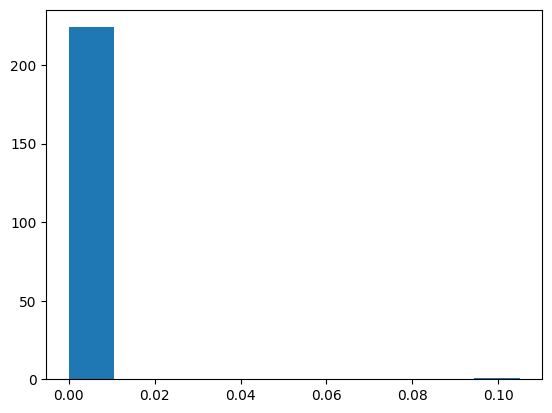

In [81]:
plt.hist(times)
print(times.mean(), times.std())

In [82]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    if qrel.relevance > 0:
        s = new_qrels.get(int(qrel.query_id), set())
        s.add(int(qrel.doc_id))
        new_qrels[int(qrel.query_id)] = s

In [83]:
def responses_umbral(responses, alpha):
    new_response = {}
    for key, list_datavalue in responses.items():
        new_response[key]= [datavalue.data for datavalue in responses[key] if datavalue.value > alpha]
    return new_response

In [84]:
def responses_r(responses, count):
    new_response = {}
    for key, list_datavalue in responses.items():
        new_response[key]= [datavalue.data for datavalue in responses[key]][:count]
    return new_response

In [85]:
def get_medidas(responses):
    medidas = {}
    for query_id, qrel in new_qrels.items():
        medidas[query_id] = (len(responses[query_id]), len(qrel), len(qrel.intersection(responses[query_id])))    
    return medidas

In [86]:
def get_recall_accuracy(medidas):
    recall = {}
    accuracy = {}
    for key, (rec, rel, rr) in medidas.items():
        if rec != 0:
            accuracy[key] = rr/rec
        else:        
            accuracy[key] = 0
        recall[key] = rr/rel
    return recall, accuracy

In [87]:
responses_0 = responses_umbral(responses, 0.0)
responses_1 = responses_umbral(responses, 0.1)
responses_2 = responses_umbral(responses, 0.2)
responses_3 = responses_umbral(responses, 0.3)
responses_r25 = responses_r(responses, 25)
responses_r50 = responses_r(responses, 50)
responses_r75 = responses_r(responses, 75)
responses_r100 = responses_r(responses, 100)

In [88]:
m_0 = get_medidas(responses_0)
m_1 = get_medidas(responses_1)
m_2 = get_medidas(responses_2)
m_3 = get_medidas(responses_3)
m_r25 = get_medidas(responses_r25)
m_r50 = get_medidas(responses_r50)
m_r75 = get_medidas(responses_r75)
m_r100 = get_medidas(responses_r100)

In [89]:
r_0, a_0 = get_recall_accuracy(m_0)
r_1, a_1 = get_recall_accuracy(m_1)
r_2, a_2 = get_recall_accuracy(m_2)
r_3, a_3 = get_recall_accuracy(m_3)
r_25, a_25 = get_recall_accuracy(m_r25)
r_50, a_50 = get_recall_accuracy(m_r50)
r_75, a_75 = get_recall_accuracy(m_r75)
r_100, a_100 = get_recall_accuracy(m_r100)

In [90]:
def plot_recall_accuracy(recall, accuracy):
    plt.scatter(recall.values(), accuracy.values(), alpha=0.1)
    recall_mean, accuracy_mean = stat.mean(recall.values()), stat.mean(accuracy.values())
    print(recall_mean, accuracy_mean)
    plt.scatter(recall_mean, accuracy_mean)

0.6893800408302472 0.00751145173651892


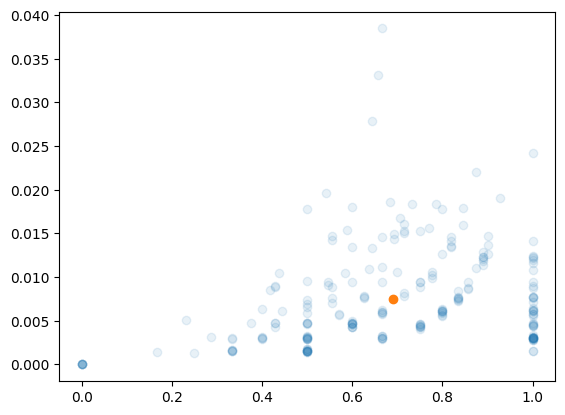

In [91]:
plot_recall_accuracy(r_0,a_0)

0.3649713164372607 0.021716770175228627


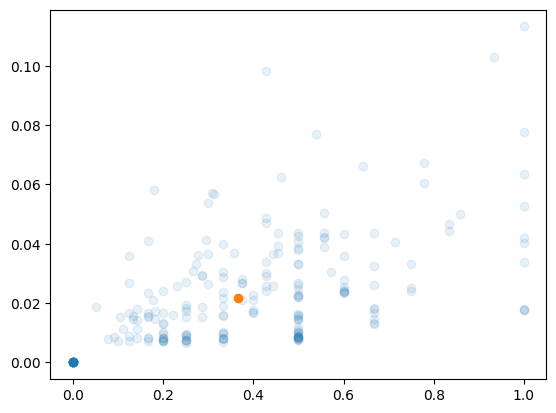

In [92]:
plot_recall_accuracy(r_1,a_1)

0.1883972354805688 0.0597062722759151


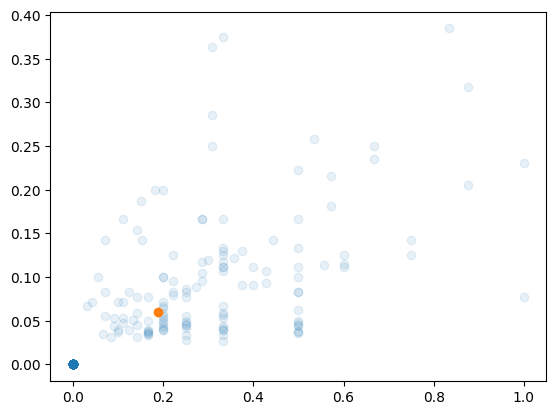

In [93]:
plot_recall_accuracy(r_2,a_2)

0.0869642826309493 0.09795707995707996


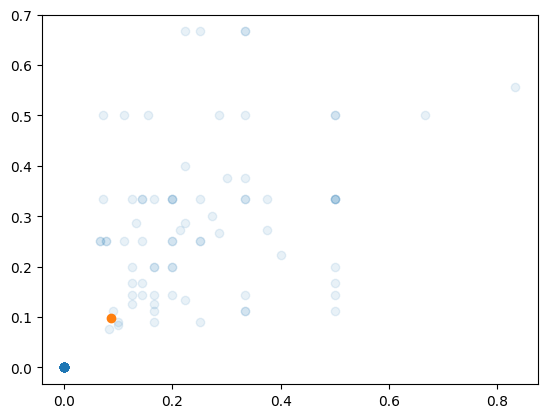

In [94]:
plot_recall_accuracy(r_3,a_3)

0.20483702281741498 0.05173333333333333


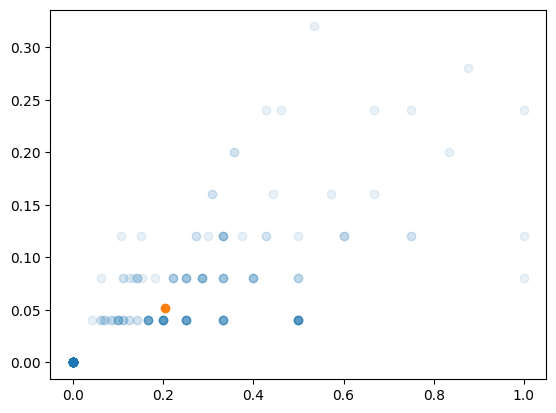

In [95]:
plot_recall_accuracy(r_25,a_25)

0.2653636790721414 0.03431111111111111


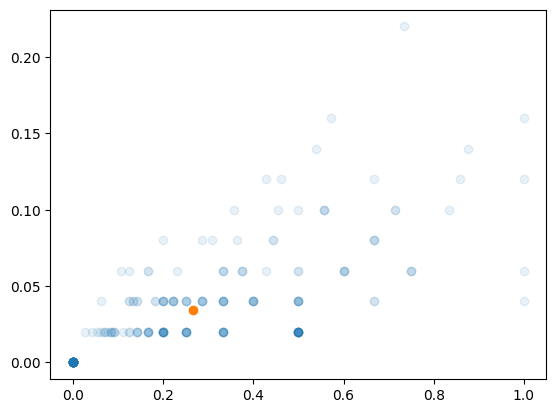

In [96]:
plot_recall_accuracy(r_50,a_50)

0.3156446982478974 0.02725925925925926


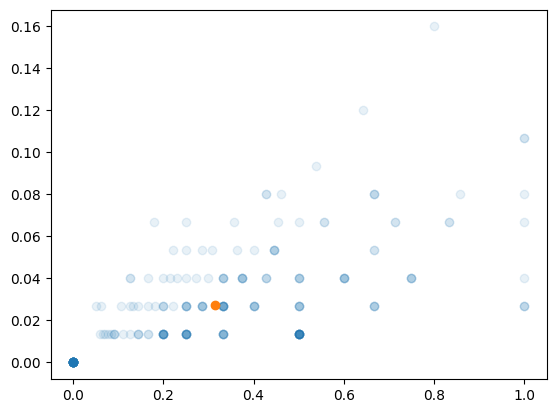

In [97]:
plot_recall_accuracy(r_75,a_75)

0.34582501901645346 0.022755555555555557


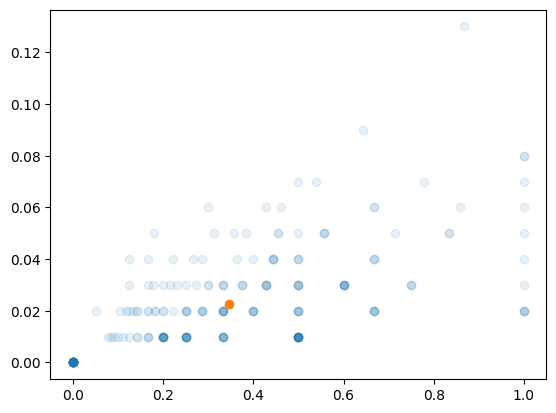

In [98]:
plot_recall_accuracy(r_100,a_100)

In [99]:
def plot_means(medidas, names):
    index = 0
    for recall, accuracy in medidas:
        recall_mean, accuracy_mean = stat.mean(recall.values()), stat.mean(accuracy.values())
        print(recall_mean, accuracy_mean)
        plt.scatter(recall_mean, accuracy_mean, label=names[index])
        index+=1
    plt.legend()

0.6893800408302472 0.00751145173651892
0.3649713164372607 0.021716770175228627
0.1883972354805688 0.0597062722759151
0.0869642826309493 0.09795707995707996
0.20483702281741498 0.05173333333333333
0.2653636790721414 0.03431111111111111
0.3156446982478974 0.02725925925925926
0.34582501901645346 0.022755555555555557


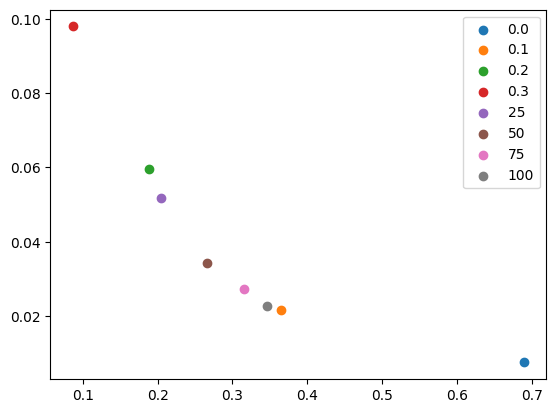

In [100]:
medidas = [
    (r_0, a_0),
    (r_1, a_1),
    (r_2, a_2),
    (r_3, a_3),
    (r_25, a_25),
    (r_50, a_50),
    (r_75, a_75),
    (r_100, a_100),
]
names= ['0.0','0.1','0.2','0.3','25','50','75','100']
plot_means(medidas, names)